In [1]:
import numpy as np
#from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.svm import SVC

In [2]:
# Loading Data Files
import pandas as pd
wisc_bc = pd.read_csv(r"C:\MachineLearning\Breast_Cancer_KNN\wisc_bc_data.csv")
print(wisc_bc.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0  87139402         B        12.32         12.39           78.85      464.1   
1   8910251         B        10.60         18.95           69.28      346.4   
2    905520         B        11.04         16.83           70.92      373.2   
3    868871         B        11.28         13.39           73.00      384.8   
4   9012568         B        15.19         13.21           97.65      711.8   

   smoothness_mean  compactness_mean  concavity_mean  points_mean  ...  \
0          0.10280           0.06981         0.03987      0.03700  ...   
1          0.09688           0.11470         0.06387      0.02642  ...   
2          0.10770           0.07804         0.03046      0.02480  ...   
3          0.11640           0.11360         0.04635      0.04796  ...   
4          0.07963           0.06934         0.03393      0.02657  ...   

   radius_worst  texture_worst  perimeter_worst  area_worst  smoothness_worst  \

In [3]:
wisc_bc.isna().sum()
wisc_bc.dtypes
wisc_bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 569 non-null    int64  
 1   diagnosis          569 non-null    object 
 2   radius_mean        569 non-null    float64
 3   texture_mean       569 non-null    float64
 4   perimeter_mean     569 non-null    float64
 5   area_mean          569 non-null    float64
 6   smoothness_mean    569 non-null    float64
 7   compactness_mean   569 non-null    float64
 8   concavity_mean     569 non-null    float64
 9   points_mean        569 non-null    float64
 10  symmetry_mean      569 non-null    float64
 11  dimension_mean     569 non-null    float64
 12  radius_se          569 non-null    float64
 13  texture_se         569 non-null    float64
 14  perimeter_se       569 non-null    float64
 15  area_se            569 non-null    float64
 16  smoothness_se      569 non

In [4]:
from sklearn.preprocessing import LabelEncoder
lr= LabelEncoder()
wisc_bc['diagnosis']=lr.fit_transform(wisc_bc['diagnosis'])


In [5]:
X=wisc_bc.drop('diagnosis',axis=1)
Y=wisc_bc['diagnosis']

In [6]:
# The fit_transform method is called on the StandardScaler instance (ss) with X as the argument. Here, X represents the data that you want to standardize.
# here X_s is the standardized data, X is the original data, mean(X) is the mean of X, and std(X) is the standard deviation of X

from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_s=ss.fit_transform(X)

In [7]:
from sklearn.model_selection import train_test_split
#train_test_split function randomly shuffles the data and splits it into four subsets
xtr,xte,ytr,yte=train_test_split(X_s,Y,test_size=0.7) #specifies that 70% of the data should be allocated for testing, while the remaining 30% will be used for training.

In [8]:
from sklearn.tree import DecisionTreeClassifier
clf_dt=DecisionTreeClassifier()
#The classifier learns patterns in the training data to make predictions.
clf_dt.fit(xtr,ytr)
ypre_dt=clf_dt.predict(xte)
# This line uses the trained classifier (clf_dt) to predict the labels for the testing set (xte). 
# The predict method takes the testing set's input features as an argument and returns the predicted labels. 
# The predicted labels are then assigned to the variable ypre_dt.

In [9]:
# from sklearn.neural_network import
# demonstrated the usage of scikit-learn's MLPClassifier for classification tasks using a multi-layer perceptron (MLP) neural network.
# Chose two hidden layers, the first with 5 neurons and the second with 2 neurons
from sklearn.neural_network import MLPClassifier
clf_nn = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
clf_nn.fit(xtr,ytr)
ypre_nn=clf_nn.predict(xte)

In [10]:
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(yte,ypre_dt)
cm2=confusion_matrix(yte,ypre_nn)
print(cm1)
print(cm2)

[[232  17]
 [ 16 134]]
[[243   6]
 [ 10 140]]


In [11]:
from sklearn.metrics import accuracy_score
print(accuracy_score(yte,ypre_dt))
print(accuracy_score(yte,ypre_nn))

0.9172932330827067
0.9598997493734336


<AxesSubplot:>

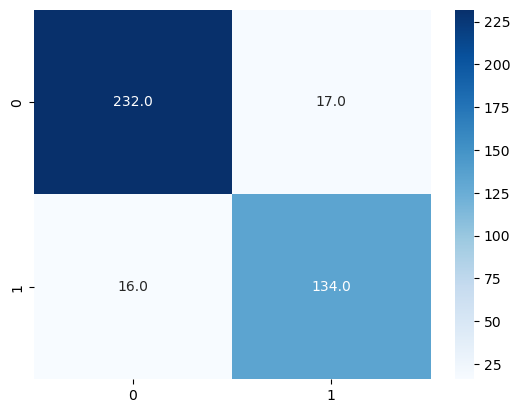

In [12]:
import seaborn as sns
sns.heatmap(cm1,annot=True,fmt='.1f', cmap= 'Blues') # Based on Decision Tree Classifier


<AxesSubplot:>

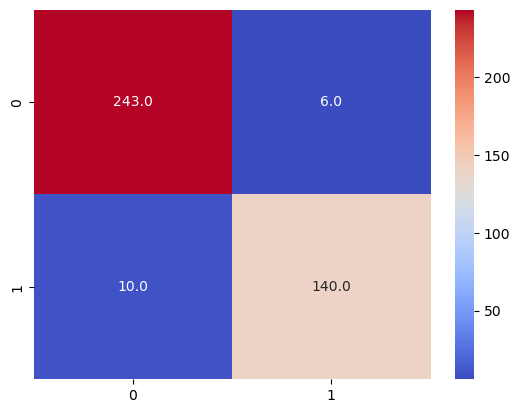

In [13]:
sns.heatmap(cm2,annot=True,fmt='.1f', cmap = 'coolwarm') # Based on Neural Network

In [15]:
linear_svm = SVC(kernel='linear', C=1, random_state=0)
linear_svm.fit(X=xtr, y= ytr)

SVC(C=1, kernel='linear', random_state=0)

SVM

In [17]:
train_predictions = linear_svm.predict(xtr)
test_predictions = linear_svm.predict(xte)

### Train data accuracy
from sklearn.metrics import accuracy_score,f1_score

print("Training Confusion Matrix : \n", confusion_matrix(ytr, train_predictions))
print("\nTRAIN DATA ACCURACY",accuracy_score(ytr,train_predictions))
print("\nTrain data f1-score for class '1'",f1_score(ytr,train_predictions,pos_label=1))
print("\nTrain data f1-score for class '2'",f1_score(ytr,train_predictions,pos_label=0))

### Test data accuracy
print("\n\n--------------------------------------\n\n")

print("Testing Confusion Matrix : \n", confusion_matrix(yte, test_predictions))
print("\nTEST DATA ACCURACY",accuracy_score(yte,test_predictions))
print("\nTest data f1-score for class '1'",f1_score(yte,test_predictions,pos_label=1))
print("\nTest data f1-score for class '2'",f1_score(yte,test_predictions,pos_label=0))

Training Confusion Matrix : 
 [[108   0]
 [  2  60]]

TRAIN DATA ACCURACY 0.9882352941176471

Train data f1-score for class '1' 0.9836065573770492

Train data f1-score for class '2' 0.9908256880733944


--------------------------------------


Testing Confusion Matrix : 
 [[242   7]
 [  9 141]]

TEST DATA ACCURACY 0.9598997493734336

Test data f1-score for class '1' 0.9463087248322148

Test data f1-score for class '2' 0.968


K-Nearest Neighbor

In [19]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.datasets import load_iris
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(xtr, ytr)

KNeighborsClassifier(n_neighbors=7)

In [20]:
train_predictions = knn.predict(xtr)
test_predictions = knn.predict(xte)

### Train data accuracy
from sklearn.metrics import accuracy_score,f1_score

print("Training Confusion Matrix : \n", confusion_matrix(ytr, train_predictions))
print("\nTRAIN DATA ACCURACY",accuracy_score(ytr,train_predictions))
print("\nTrain data f1-score for class '1'",f1_score(ytr,train_predictions,pos_label=1))
print("\nTrain data f1-score for class '2'",f1_score(ytr,train_predictions,pos_label=0))

### Test data accuracy
print("\n\n--------------------------------------\n\n")

print("Testing Confusion Matrix : \n", confusion_matrix(yte, test_predictions))
print("\nTEST DATA ACCURACY",accuracy_score(yte,test_predictions))
print("\nTest data f1-score for class '1'",f1_score(yte,test_predictions,pos_label=1))
print("\nTest data f1-score for class '2'",f1_score(yte,test_predictions,pos_label=0))

Training Confusion Matrix : 
 [[106   2]
 [  5  57]]

TRAIN DATA ACCURACY 0.9588235294117647

Train data f1-score for class '1' 0.9421487603305785

Train data f1-score for class '2' 0.9680365296803655


--------------------------------------


Testing Confusion Matrix : 
 [[243   6]
 [ 17 133]]

TEST DATA ACCURACY 0.9423558897243107

Test data f1-score for class '1' 0.9204152249134949

Test data f1-score for class '2' 0.9548133595284873


c:\Users\binay\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\binay\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

XGBoost

In [26]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [29]:
model = XGBClassifier()
model.fit(xtr, ytr)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [31]:
from xgboost import XGBClassifier

# Create an instance of the classifier
classifier = XGBClassifier()

# Train the classifier on the training data
classifier.fit(xtr, ytr)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [32]:
# Make predictions on the training and test data
train_predictions = classifier.predict(xtr)
test_predictions = classifier.predict(xte)

### Train data accuracy
from sklearn.metrics import accuracy_score,f1_score

print("Training Confusion Matrix : \n", confusion_matrix(ytr, train_predictions))
print("\nTRAIN DATA ACCURACY",accuracy_score(ytr,train_predictions))
print("\nTrain data f1-score for class '1'",f1_score(ytr,train_predictions,pos_label=1))
print("\nTrain data f1-score for class '2'",f1_score(ytr,train_predictions,pos_label=0))

### Test data accuracy
print("\n\n--------------------------------------\n\n")

print("Testing Confusion Matrix : \n", confusion_matrix(yte, test_predictions))
print("\nTEST DATA ACCURACY",accuracy_score(yte,test_predictions))
print("\nTest data f1-score for class '1'",f1_score(yte,test_predictions,pos_label=1))
print("\nTest data f1-score for class '2'",f1_score(yte,test_predictions,pos_label=0))

Traininf Confusion Matrix : 
 [[108   0]
 [  0  62]]

TRAIN DATA ACCURACY 1.0

Train data f1-score for class '1' 1.0

Train data f1-score for class '2' 1.0


--------------------------------------


Testing Confusion Matrix : 
 [[240   9]
 [ 10 140]]

TEST DATA ACCURACY 0.9523809523809523

Test data f1-score for class '1' 0.9364548494983278

Test data f1-score for class '2' 0.9619238476953907


In [ ]:
import numpy as np
#from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.svm import SVC

In [ ]:
# Loading Data Files
import pandas as pd
wisc_bc = pd.read_csv(r"C:\MachineLearning\Breast_Cancer_KNN\wisc_bc_data.csv")
print(wisc_bc.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0  87139402         B        12.32         12.39           78.85      464.1   
1   8910251         B        10.60         18.95           69.28      346.4   
2    905520         B        11.04         16.83           70.92      373.2   
3    868871         B        11.28         13.39           73.00      384.8   
4   9012568         B        15.19         13.21           97.65      711.8   

   smoothness_mean  compactness_mean  concavity_mean  points_mean  ...  \
0          0.10280           0.06981         0.03987      0.03700  ...   
1          0.09688           0.11470         0.06387      0.02642  ...   
2          0.10770           0.07804         0.03046      0.02480  ...   
3          0.11640           0.11360         0.04635      0.04796  ...   
4          0.07963           0.06934         0.03393      0.02657  ...   

   radius_worst  texture_worst  perimeter_worst  area_worst  smoothness_worst  \

In [ ]:
wisc_bc.isna().sum()
wisc_bc.dtypes
wisc_bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 569 non-null    int64  
 1   diagnosis          569 non-null    object 
 2   radius_mean        569 non-null    float64
 3   texture_mean       569 non-null    float64
 4   perimeter_mean     569 non-null    float64
 5   area_mean          569 non-null    float64
 6   smoothness_mean    569 non-null    float64
 7   compactness_mean   569 non-null    float64
 8   concavity_mean     569 non-null    float64
 9   points_mean        569 non-null    float64
 10  symmetry_mean      569 non-null    float64
 11  dimension_mean     569 non-null    float64
 12  radius_se          569 non-null    float64
 13  texture_se         569 non-null    float64
 14  perimeter_se       569 non-null    float64
 15  area_se            569 non-null    float64
 16  smoothness_se      569 non

In [ ]:
from sklearn.preprocessing import LabelEncoder
lr= LabelEncoder()
wisc_bc['diagnosis']=lr.fit_transform(wisc_bc['diagnosis'])


In [ ]:
X=wisc_bc.drop('diagnosis',axis=1)
Y=wisc_bc['diagnosis']

In [ ]:
# The fit_transform method is called on the StandardScaler instance (ss) with X as the argument. Here, X represents the data that you want to standardize.
# here X_s is the standardized data, X is the original data, mean(X) is the mean of X, and std(X) is the standard deviation of X

from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_s=ss.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
#train_test_split function randomly shuffles the data and splits it into four subsets
xtr,xte,ytr,yte=train_test_split(X_s,Y,test_size=0.7) #specifies that 70% of the data should be allocated for testing, while the remaining 30% will be used for training.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf_dt=DecisionTreeClassifier()
#The classifier learns patterns in the training data to make predictions.
clf_dt.fit(xtr,ytr)
ypre_dt=clf_dt.predict(xte)
# This line uses the trained classifier (clf_dt) to predict the labels for the testing set (xte). 
# The predict method takes the testing set's input features as an argument and returns the predicted labels. 
# The predicted labels are then assigned to the variable ypre_dt.

In [ ]:
# from sklearn.neural_network import
# demonstrated the usage of scikit-learn's MLPClassifier for classification tasks using a multi-layer perceptron (MLP) neural network.
# Chose two hidden layers, the first with 5 neurons and the second with 2 neurons
from sklearn.neural_network import MLPClassifier
clf_nn = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
clf_nn.fit(xtr,ytr)
ypre_nn=clf_nn.predict(xte)

In [ ]:
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(yte,ypre_dt)
cm2=confusion_matrix(yte,ypre_nn)
print(cm1)
print(cm2)

[[232  17]
 [ 16 134]]
[[243   6]
 [ 10 140]]


In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(yte,ypre_dt))
print(accuracy_score(yte,ypre_nn))

0.9172932330827067
0.9598997493734336


<AxesSubplot:>

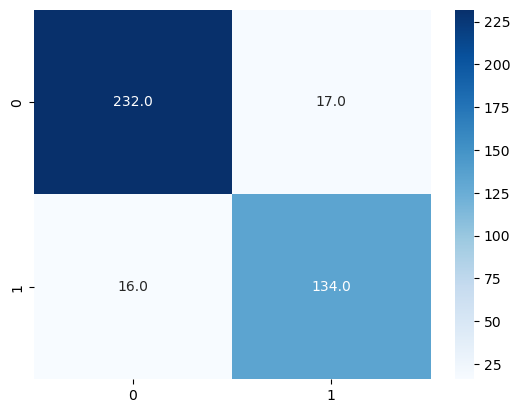

In [ ]:
import seaborn as sns
sns.heatmap(cm1,annot=True,fmt='.1f', cmap= 'Blues') # Based on Decision Tree Classifier


<AxesSubplot:>

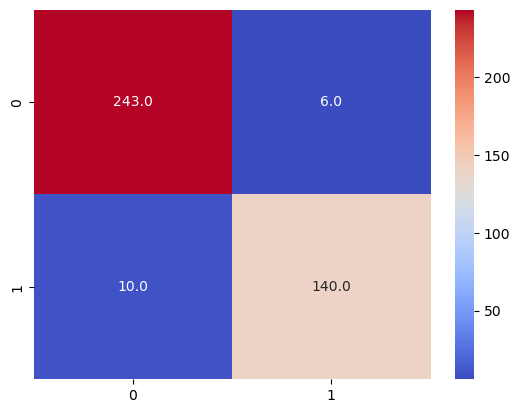

In [ ]:
sns.heatmap(cm2,annot=True,fmt='.1f', cmap = 'coolwarm') # Based on Neural Network

In [ ]:
linear_svm = SVC(kernel='linear', C=1, random_state=0)
linear_svm.fit(X=xtr, y= ytr)

SVC(C=1, kernel='linear', random_state=0)

SVM

In [ ]:
train_predictions = linear_svm.predict(xtr)
test_predictions = linear_svm.predict(xte)

### Train data accuracy
from sklearn.metrics import accuracy_score,f1_score

print("Training Confusion Matrix : \n", confusion_matrix(ytr, train_predictions))
print("\nTRAIN DATA ACCURACY",accuracy_score(ytr,train_predictions))
print("\nTrain data f1-score for class '1'",f1_score(ytr,train_predictions,pos_label=1))
print("\nTrain data f1-score for class '2'",f1_score(ytr,train_predictions,pos_label=0))

### Test data accuracy
print("\n\n--------------------------------------\n\n")

print("Testing Confusion Matrix : \n", confusion_matrix(yte, test_predictions))
print("\nTEST DATA ACCURACY",accuracy_score(yte,test_predictions))
print("\nTest data f1-score for class '1'",f1_score(yte,test_predictions,pos_label=1))
print("\nTest data f1-score for class '2'",f1_score(yte,test_predictions,pos_label=0))

Training Confusion Matrix : 
 [[108   0]
 [  2  60]]

TRAIN DATA ACCURACY 0.9882352941176471

Train data f1-score for class '1' 0.9836065573770492

Train data f1-score for class '2' 0.9908256880733944


--------------------------------------


Testing Confusion Matrix : 
 [[242   7]
 [  9 141]]

TEST DATA ACCURACY 0.9598997493734336

Test data f1-score for class '1' 0.9463087248322148

Test data f1-score for class '2' 0.968


K-Nearest Neighbor

In [ ]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.datasets import load_iris
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(xtr, ytr)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
train_predictions = knn.predict(xtr)
test_predictions = knn.predict(xte)

### Train data accuracy
from sklearn.metrics import accuracy_score,f1_score

print("Training Confusion Matrix : \n", confusion_matrix(ytr, train_predictions))
print("\nTRAIN DATA ACCURACY",accuracy_score(ytr,train_predictions))
print("\nTrain data f1-score for class '1'",f1_score(ytr,train_predictions,pos_label=1))
print("\nTrain data f1-score for class '2'",f1_score(ytr,train_predictions,pos_label=0))

### Test data accuracy
print("\n\n--------------------------------------\n\n")

print("Testing Confusion Matrix : \n", confusion_matrix(yte, test_predictions))
print("\nTEST DATA ACCURACY",accuracy_score(yte,test_predictions))
print("\nTest data f1-score for class '1'",f1_score(yte,test_predictions,pos_label=1))
print("\nTest data f1-score for class '2'",f1_score(yte,test_predictions,pos_label=0))

Training Confusion Matrix : 
 [[106   2]
 [  5  57]]

TRAIN DATA ACCURACY 0.9588235294117647

Train data f1-score for class '1' 0.9421487603305785

Train data f1-score for class '2' 0.9680365296803655


--------------------------------------


Testing Confusion Matrix : 
 [[243   6]
 [ 17 133]]

TEST DATA ACCURACY 0.9423558897243107

Test data f1-score for class '1' 0.9204152249134949

Test data f1-score for class '2' 0.9548133595284873


c:\Users\binay\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\binay\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

XGBoost

In [ ]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [ ]:
model = XGBClassifier()
model.fit(xtr, ytr)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
from xgboost import XGBClassifier

# Create an instance of the classifier
classifier = XGBClassifier()

# Train the classifier on the training data
classifier.fit(xtr, ytr)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
# Make predictions on the training and test data
train_predictions = classifier.predict(xtr)
test_predictions = classifier.predict(xte)

### Train data accuracy
from sklearn.metrics import accuracy_score,f1_score

print("Training Confusion Matrix : \n", confusion_matrix(ytr, train_predictions))
print("\nTRAIN DATA ACCURACY",accuracy_score(ytr,train_predictions))
print("\nTrain data f1-score for class '1'",f1_score(ytr,train_predictions,pos_label=1))
print("\nTrain data f1-score for class '2'",f1_score(ytr,train_predictions,pos_label=0))

### Test data accuracy
print("\n\n--------------------------------------\n\n")

print("Testing Confusion Matrix : \n", confusion_matrix(yte, test_predictions))
print("\nTEST DATA ACCURACY",accuracy_score(yte,test_predictions))
print("\nTest data f1-score for class '1'",f1_score(yte,test_predictions,pos_label=1))
print("\nTest data f1-score for class '2'",f1_score(yte,test_predictions,pos_label=0))

Traininf Confusion Matrix : 
 [[108   0]
 [  0  62]]

TRAIN DATA ACCURACY 1.0

Train data f1-score for class '1' 1.0

Train data f1-score for class '2' 1.0


--------------------------------------


Testing Confusion Matrix : 
 [[240   9]
 [ 10 140]]

TEST DATA ACCURACY 0.9523809523809523

Test data f1-score for class '1' 0.9364548494983278

Test data f1-score for class '2' 0.9619238476953907


Based on the results obtained from the different classification algorithms, the following conclusions can be drawn:

1.Decision Tree Classifier: The decision tree classifier shows good performance on both the training and test data, with high accuracy and f1-scores for both classes. It exhibits a clear decision-making process, which makes it interpretable. However, there is a possibility of overfitting, as the training accuracy is significantly higher than the test accuracy.

2.Neural Network Classifier: The neural network classifier (MLPClassifier) demonstrates competitive performance with decent accuracy and f1-scores on the test data. Neural networks have the advantage of capturing complex relationships in the data. However, they can be computationally expensive to train, and their interpretability is limited compared to decision trees.

3.Support Vector Machine (SVM): The linear SVM classifier performs well, with high accuracy and f1-scores on both training and test data. SVMs are known for their effectiveness in handling high-dimensional data and providing good generalization. They are also relatively interpretable, especially in the case of linear kernels.

4.K-Nearest Neighbors (KNN): The KNN classifier achieves reasonable accuracy and f1-scores on the test data. However, KNN can be computationally expensive, especially as the number of neighbors increases. It may not scale well to large datasets. Interpretability is also limited in KNN compared to decision trees.

5.XGBoost Classifier: The XGBoost classifier demonstrates strong performance with high accuracy and f1-scores on both training and test data. XGBoost is an ensemble method known for its ability to handle complex datasets and deliver competitive results. It may offer improved performance compared to individual decision trees. However, interpretability is challenging in ensemble models like XGBoost.

Overall, the decision tree classifier, SVM, and XGBoost classifier exhibit the best performance in terms of accuracy and f1-scores. The choice of algorithm depends on factors such as interpretability, scalability, and the specific requirements of the problem. It is recommended to further investigate the models showing promising results and perform additional evaluations, such as cross-validation, to ensure robustness.